In [1]:
import pandas as pd

In [2]:
df_fifa = pd.read_csv('players_16.csv')

In [3]:
df_fifa.drop(["player_url","sofifa_id","short_name","long_name","dob","nationality","club","player_positions","preferred_foot","work_rate","body_type","real_face","release_clause_eur","player_tags","team_position","team_jersey_number","loaned_from","joined","contract_valid_until","nation_position","nation_jersey_number","player_traits","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","movement_reactions","movement_balance","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","defending_marking","defending_standing_tackle","defending_sliding_tackle","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes","ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb"
],axis=1, inplace=True)

In [4]:
df_fifa.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning'],
      dtype='object')

In [5]:
df_fifa.dtypes

age                           int64
height_cm                     int64
weight_kg                     int64
overall                       int64
potential                     int64
value_eur                     int64
wage_eur                      int64
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
pace                        float64
shooting                    float64
passing                     float64
dribbling                   float64
defending                   float64
physic                      float64
gk_diving                   float64
gk_handling                 float64
gk_kicking                  float64
gk_reflexes                 float64
gk_speed                    float64
gk_positioning              float64
dtype: object

In [6]:
from pycaret.regression import *

In [7]:
exp_reg = setup(df_fifa, target='potential')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5418
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(14881, 22)"
4,Missing Values,True
5,Numeric Features,18
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
df_fifa.head(5)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,28,170,72,94,95,111000000,550000,5,4,4,...,86.0,95.0,24.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN
1,30,185,80,93,93,85500000,475000,5,4,5,...,80.0,91.0,33.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN
2,31,180,80,90,90,56000000,250000,5,2,4,...,82.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN
3,29,193,92,90,90,58000000,250000,5,4,1,...,NaN,NaN,NaN,NaN,85.0,87.0,91.0,86.0,60.0,90.0
4,28,182,85,90,90,69000000,300000,5,4,4,...,79.0,87.0,42.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# compare models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.6748,0.8887,0.9423,0.9774,0.0133,0.0096,6.6798
1,Extra Trees Regressor,0.6119,0.9201,0.9585,0.9766,0.0136,0.0087,6.7845
2,Extreme Gradient Boosting,0.7084,0.9690,0.9841,0.9754,0.0140,0.0101,1.5868
3,Light Gradient Boosting Machine,0.7188,1.0183,1.0085,0.9741,0.0143,0.0103,0.2340
4,Random Forest,0.6705,1.0685,1.0328,0.9729,0.0146,0.0096,8.1594
5,Gradient Boosting Regressor,0.9003,1.5200,1.2326,0.9614,0.0175,0.0129,5.3901
6,Decision Tree,0.8313,2.0199,1.4203,0.9487,0.0201,0.0118,0.2624
7,Linear Regression,1.5961,4.3314,2.0801,0.8901,0.0299,0.0230,0.1069
8,Ridge Regression,1.5960,4.3317,2.0802,0.8901,0.0299,0.0230,0.0376
9,Bayesian Ridge,1.5962,4.3398,2.0821,0.8898,0.0299,0.0230,0.0840


In [10]:
#Create model based on best models comparison
catB = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6532,0.8233,0.9074,0.9787,0.0126,0.0092
1,0.6805,0.9253,0.9619,0.9767,0.0135,0.0097
2,0.6781,0.8605,0.9276,0.9782,0.0130,0.0097
3,0.6715,0.8776,0.9368,0.9776,0.0135,0.0097
4,0.6992,0.9085,0.9532,0.9765,0.0135,0.0100
5,0.6591,0.8593,0.9270,0.9778,0.0131,0.0094
6,0.6695,0.8679,0.9316,0.9785,0.0131,0.0096
7,0.6842,0.9102,0.9541,0.9762,0.0134,0.0097
8,0.6626,0.8441,0.9187,0.9795,0.0130,0.0094
9,0.6896,1.0104,1.0052,0.9745,0.0145,0.0099


In [11]:
#Tune Model
tuned_cat = tune_model(catB)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6637,0.8347,0.9136,0.9785,0.0127,0.0094
1,0.7079,0.9619,0.9808,0.9758,0.0138,0.0101
2,0.6887,0.8668,0.9310,0.9781,0.0132,0.0098
3,0.6708,0.8786,0.9374,0.9776,0.0135,0.0097
4,0.7111,0.9230,0.9607,0.9762,0.0136,0.0101
5,0.6817,0.9074,0.9525,0.9766,0.0134,0.0097
6,0.7001,0.9191,0.9587,0.9772,0.0135,0.0100
7,0.7124,0.9613,0.9805,0.9749,0.0139,0.0102
8,0.6831,0.8664,0.9308,0.9790,0.0131,0.0097
9,0.7210,1.0798,1.0391,0.9727,0.0150,0.0104


In [13]:
tuned_cat.feature_importances_

array([2.56855241e+01, 1.13035318e-01, 1.24274159e-01, 2.88126212e+01,
       4.30237424e+01, 3.54264400e-01, 1.31137083e-01, 2.85986619e-01,
       1.49371194e-01, 8.46588399e-02, 5.28375594e-01, 9.56967200e-02,
       2.36006532e-01, 6.49870478e-02, 3.79167453e-02, 2.64382068e-02,
       1.30804636e-02, 1.55521519e-02, 1.29132727e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.36669216e-04, 3.98062788e-03,
       1.04238963e-02, 1.98821480e-02, 0.00000000e+00, 1.56674605e-03,
       8.53496865e-02, 2.99271443e-02, 4.46876771e-02, 6.41796271e-03,
       1.94538956e-03])

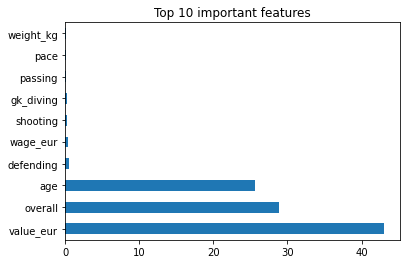

In [23]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(tuned_cat.feature_importances_, index=tuned_cat.feature_names_)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features")
plt.show()

### https://github.com/slundberg/shap#citations
### Use SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostRegressor object at 0x000000E9978336D8>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


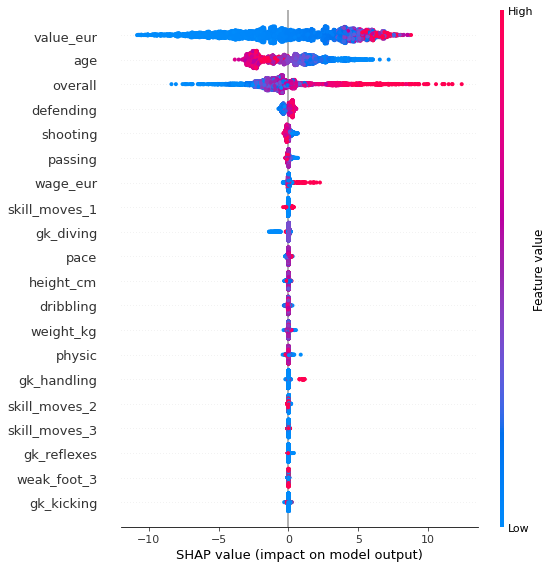

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [26]:
interpret_model(tuned_cat)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostRegressor object at 0x000000E9978336D8>, plot=correlation, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


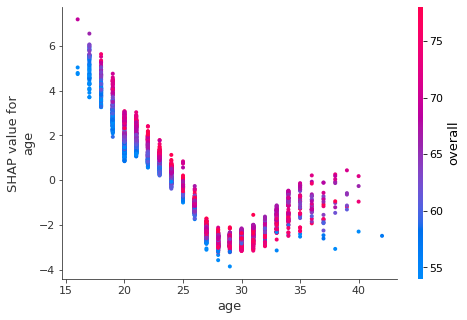

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [35]:
interpret_model(tuned_cat, plot = 'correlation')

In [34]:
interpret_model(tuned_cat, plot = 'reason', observation = 0) 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostRegressor object at 0x000000E9978336D8>, plot=reason, feature=None, observation=0)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: reason
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [36]:
predictions = predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.6811,0.8726,0.9341,0.9782,0.0132,0.0097


In [37]:
df_fifa17 = pd.read_csv('players_17.csv')
predictions = predict_model(tuned_cat, data = df_fifa17)

In [57]:
result= predictions[['short_name', 'potential', 'age', 'Label']]

In [58]:
result

,short_name,potential,age,Label
0,Cristiano Ronaldo,94,31,91.6071
1,L. Messi,93,29,89.4327
2,Neymar,95,24,91.9163
3,M. Neuer,92,30,88.1877
4,L. Suárez,92,29,90.2690
...,...,...,...,...
17004,T. Ouldridge,61,17,61.2416
17005,M. Foden,59,20,58.8091
17006,D. Mahon,59,18,60.8742
17007,B. Kelly,54,18,55.2176


In [59]:
finalize_model(tuned_cat)

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 5
INFO:logs:<catboost.core.CatBoostRegressor object at 0x000000E9C00BA780>
INFO:logs:finalize_model() succesfully completed......................................


In [61]:
save_model(tuned_cat, 'fifa_potential_regression')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=<catboost.core.CatBoostRegressor object at 0x000000E9978336D8>, model_name=fifa_potential_regression, verbose=True)
INFO:logs:Appending prep pipeline
INFO:logs:fifa_potential_regression.pkl saved in current working directory
INFO:logs:[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='potential',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Leve...
                ('group',

Transformation Pipeline and Model Succesfully Saved
